<a href="https://colab.research.google.com/github/hariharan72/voice-to-text-qcnn-using-python/blob/main/VOICE_TO_TEXT_QCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydub
!pip install librosa
!pip install SpeechRecognition
!pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16351 sha256=7d2adc9537d6bc5e32eca66d3f23bb94ca368ada9be66c0bf77e42f6059517fa
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uni

# **Recording Your Sound**

In [ ]:
from google.colab import output as colab_output
from googletrans import Translator, LANGUAGES
from googletrans.models import Translated
from base64 import b64decode
from io import BytesIO
from pydub import AudioSegment
import speech_recognition as sr
import IPython.display as ipd
import librosa
r = sr.Recognizer()

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""


def record(seconds=5):
    display(ipd.Javascript(RECORD))
    print(f"Recording started for {seconds} seconds.")
    s = colab_output.eval_js("record(%d)" % (seconds * 1000))
    print("Recording ended.")
    b = b64decode(s.split(",")[1])

    fileformat = "wav"
    filename = f"audio.{fileformat}"
    AudioSegment.from_file(BytesIO(b)).export(filename, format=fileformat)
    return librosa.load(filename)


waveform, sample_rate = record()
ipd.Audio(waveform, rate=sample_rate)

<IPython.core.display.Javascript object>

Recording started for 5 seconds.
Recording ended.


In [ ]:
!cd content/drive/MyDrive/Voice to Text

/bin/bash: line 1: cd: too many arguments


In [ ]:
! git clone https://github.com/huckiyang/QuantumSpeech-QCNN

fatal: destination path 'QuantumSpeech-QCNN' already exists and is not an empty directory.


---- Log-Mel of Your Recorded Speech
-- Orginal sampling rate from computer's microphone 22050 Hz


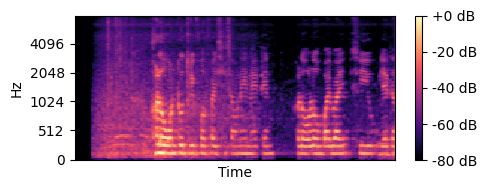

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 5, 2
print("---- Log-Mel of Your Recorded Speech")

samp_rate = 16000
go_wav = '/content/audio.wav'

def audio_feat(wav_path):
    y, s_sr = librosa.load(wav_path)
    mel_feat = librosa.feature.melspectrogram(y=y, sr=samp_rate)
    # mel_feat = librosa.feature.melspectrogram(y, sr=samp_rate, n_fft=1024, hop_length=128, power=1.0, n_mels=60, fmin=40.0, fmax=samp_rate/2)
    plt.figure()
    img = librosa.display.specshow(librosa.power_to_db(mel_feat, ref=np.max), y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time', fontsize=10)
    plt.tight_layout()
    return y, s_sr, mel_feat

raw_wav, ori_sr, mel_feat = audio_feat(go_wav)
print("-- Orginal sampling rate from computer's microphone", ori_sr, "Hz")


In [ ]:
! pip install pennylane
! pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.4 MB/s eta 0:00:00


In [ ]:
import pickle
import pennylane as qml
from pennylane import numpy as qnp
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from tqdm import tqdm
import warnings
import qiskit

n_w = 4 # numbers of wires def 4
noise_mode = False # for running at QPU

if  noise_mode == True:
    dev = qml.device('qiskit.aer', wires= n_w, noise_model=noise_model)
else:
    dev = qml.device("default.qubit", wires= n_w)

n_layers = 1
names = 'tamil'
# Random circuit parameters
rand_params = np.random.uniform(high= 2 * qnp.pi, size=(n_layers, n_w)) # def 2, n_w = 4

@qml.qnode(dev)
def circuit(phi=None):
    # Encoding of 4 classical input values
    for j in range(n_w):
        qml.RY(qnp.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(n_w)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(n_w)]

def quanv(image, kr=2):
    h_feat, w_feat = image.shape
    """Convolves the input speech with many applications of the same quantum circuit."""
    out = np.zeros((h_feat//kr, w_feat//kr, n_w))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, h_feat, kr):
        for k in range(0, w_feat, kr):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                # kernal 3 ## phi=[image[j, k, 0], image[j, k + 1, 0], image[j, k + 2, 0], image[j + 1, k, 0],
                # image[j + 1, k + 1, 0], image[j + 1, k +2 , 0],image[j+2, k, 0], image[j+2, k+1, 0], image[j+2, k+2, 0]]
                phi=[image[j, k], image[j, k + 1], image[j + 1, k], image[j + 1, k + 1]]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(n_w):
                out[j // kr, k // kr, c] = q_results[c]
    return out

# **Feature Encoding by Random Quantum Circuit**

In [ ]:
q_mel_feat = quanv(mel_feat)

IndexError: ignored

# **Visualization for Each Convolutional Channel**

In [ ]:
n_samples = 1
n_channels = 4

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10


def channel_show(mel_feat, q_mel_feat):
    plt.figure()
    plt.subplot(5,  1, 1)
    librosa.display.specshow(librosa.power_to_db(mel_feat, ref=np.max), y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel-Features")

    # Plot all output channels
    for c in range(n_channels):
        plt.subplot(5, 1 , c + 2)
        librosa.display.specshow(librosa.power_to_db(q_mel_feat[:,:,c], ref=np.max), y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title("Quantum Encoded Features in Channel: " + str(c  + 1))
    plt.tight_layout()
    plt.show()
with sr.AudioFile(go_wav) as source:
  audio_data = r.record(source)
  text = r.recognize_google(audio_data)
  print(text)
channel_show(mel_feat, q_mel_feat)

hello 1 2 3 4 5 6 7 8 9 10 hello hello bye bye see you


NameError: ignored

In [ ]:
lang = list(LANGUAGES.values())
print("Welcome to Py_Guy Translate")
# input_text = input("Please Enter Your Text in english:\n")
input_text = text
out_lang = names.lower()
if out_lang not in lang:
    print("Sorry This Language is not available to translate")
else:
    translator = Translator()
    translated = translator.translate(text=input_text, src="english",dest=out_lang)
    translated = str(translated).split(", ")
    converted = translated[2]
    pro = translated[3]
    print(converted)
    print(pro)

Welcome to Py_Guy Translate
text=வணக்கம் 1 2 3 4 5 6 7 8 9 10 வணக்கம் வணக்கம் வருகிறேன் வருகிறேன்
pronunciation=Vaṇakkam 1 2 3 4 5 6 7 8 9 10 vaṇakkam vaṇakkam varukiṟēṉ varukiṟēṉ
